In [1]:
import json
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append("../../")

import movie_annotation.processing_labels as processing_labels
import data_preprocessing.create_vectors_from_time_points as create_vectors_from_time_points
import data_base.config as config

Please enter DataJoint username:  tamara
Please enter DataJoint password:  ·········


Connecting tamara@localhost:3306


## Extract labels from json file

In [2]:
def extract_labels_from_json_file(path_to_file, label_name, bool_save_start_end_times, bool_save_indicator_function, path_save_files=None):
    with open(path_to_file,'r') as jsonfile:
        labels_json_file = json.load(jsonfile) 
        
    label_start_end_times = []
    for annotation in labels_json_file.get("annotations"):
        if annotation.get("type") == label_name:
            label_start_end_times.append([annotation.get("begin"), annotation.get("end")])

    if bool_save_start_end_times:
        start_end_times_seconds = [[x/1000, y/1000] for [x,y] in label_start_end_times]
        np.save("../useful_data/start_end_times/start_end_times_{}_20200203.npy".format(label_name), start_end_times_seconds)
    
    indicator_function = processing_labels.make_label_from_start_stop_times(label_start_end_times)
    
    if bool_save_indicator_function:
        np.save("../indicators/{}_indicator_fxn_20200203.npy".format(label_name), indicator_function)
    
    return label_start_end_times, indicator_function

In [2]:
def start_stop_times_values_from_json(path_to_file, label_name):
    # open and read json file
    with open(path_to_file,'r') as jsonfile:
        labels_json_file = json.load(jsonfile) 
        
    start_times = []
    stop_times = []
    values = []
    # iterate through elements in json file to extract time points of segments
    for annotation in labels_json_file.get("annotations"):
        if annotation.get("type") == label_name:
            start_times.append(annotation.get("begin"))
            stop_times.append(annotation.get("end"))
            values.append(annotation.get("title"))
            
    return np.array(values), np.array(start_times)/1000, np.array(stop_times)/1000

In [4]:
def save_label(label_name_in_json, directory_save, path_json_file, new_label_name):
    start_end_times, indicator_function = extract_labels_from_json_file(path_json_file, label_name_in_json, False, False)
    label = processing_labels.make_label_from_start_stop_times(start_end_times)
    np.save("{}/{}.npy".format(directory_save, new_label_name), label)

In [5]:
#save_label("kids", "/home/tamara/Documents/DeepHumanVision_pilot/movie_annotation/labels/vorspann_und_co/", "/home/tamara/Documents/advene/500days_of_summer_abspann_vorspann.json", "36_kidssegment_p5_20200221_moviespecifics.npy")

In [6]:
#start_end_times, indicator_function = extract_labels_from_json_file("/home/tamara/Documents/advene/500days_of_summer_abspann_vorspann.json", "ikea", False, False)

In [3]:
values, starts, stops = start_stop_times_values_from_json("/home/tamara/Documents/advene/500days_of_summer_abspann_vorspann.json", "ikea")

In [4]:
print(values, starts, stops)

['1' '1' '1' '1' '1'] [ 294.966 1555.591 1576.454 3409.927 3959.482] [ 299.63  1573.631 1763.313 3412.464 3962.867]


In [5]:
label = processing_labels.make_label_from_start_stop_times(values, starts, stops)

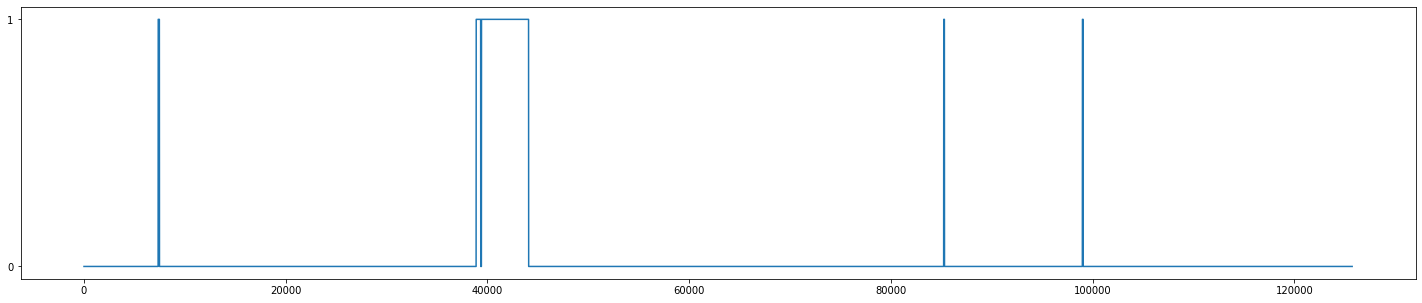

In [6]:
plt.figure(figsize=(25,5))
plt.plot(label)

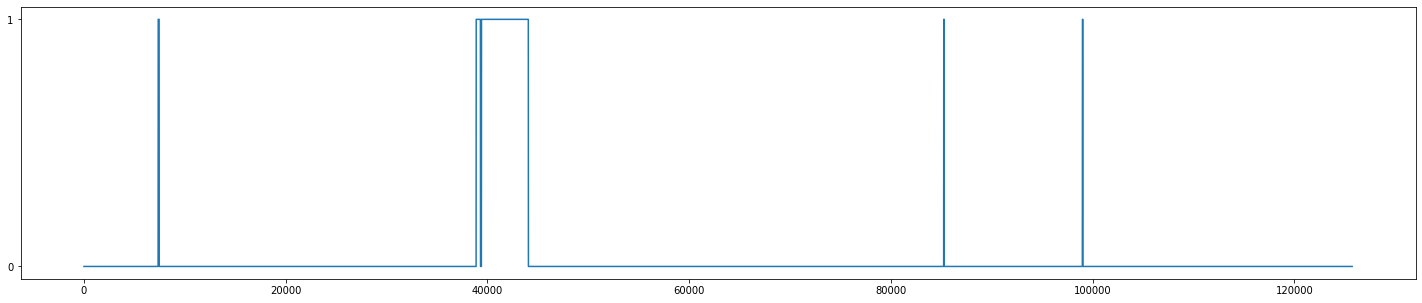

In [7]:
values2, starts2, stops2 = create_vectors_from_time_points.get_start_stop_times_from_label(config.PTS_MOVIE_new, label)
label2 = processing_labels.make_label_from_start_stop_times(values2, starts2, stops2)
plt.figure(figsize=(25,5))
plt.plot(label2)

In [23]:
label2 == label

difs = []
for i in range(len(label)):
    if not label[i] == label2[i]:
        difs.append(i)
        
difs

[7449,
 7450,
 7451,
 7452,
 7453,
 7454,
 7455,
 7456,
 7457,
 7458,
 7459,
 7460,
 7461,
 7462,
 7463,
 7464,
 7465,
 7466,
 7467,
 7468,
 7469,
 7470,
 7471,
 7472,
 7473,
 39299,
 39300,
 39301,
 39302,
 39303,
 39304,
 39305,
 39306,
 39307,
 39308,
 39309,
 39310,
 39311,
 39312,
 39313,
 39314,
 39315,
 39316,
 39317,
 39318,
 39319,
 39320,
 39321,
 39322,
 39323,
 44049,
 44050,
 44051,
 44052,
 44053,
 44054,
 44055,
 44056,
 44057,
 44058,
 44059,
 44060,
 44061,
 44062,
 44063,
 44064,
 44065,
 44066,
 44067,
 44068,
 44069,
 44070,
 44071,
 44072,
 44073,
 85274,
 85275,
 85276,
 85277,
 85278,
 85279,
 85280,
 85281,
 85282,
 85283,
 85284,
 85285,
 85286,
 85287,
 85288,
 85289,
 85290,
 85291,
 85292,
 85293,
 85294,
 85295,
 85296,
 85297,
 85298,
 99024,
 99025,
 99026,
 99027,
 99028,
 99029,
 99030,
 99031,
 99032,
 99033,
 99034,
 99035,
 99036,
 99037,
 99038,
 99039,
 99040,
 99041,
 99042,
 99043,
 99044,
 99045,
 99046,
 99047,
 99048]

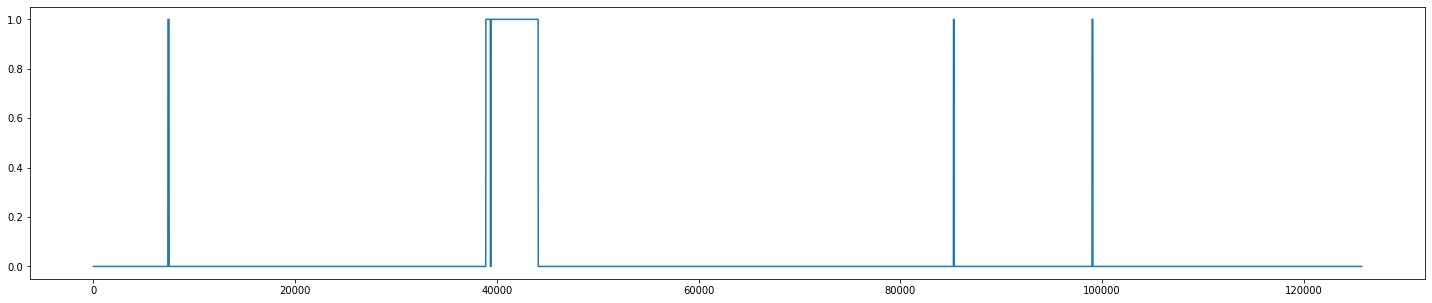

In [12]:
sys.path.append("/home/tamara/Documents/DeepHumanVision_pilot/")
from data_base.db_setup import *
label_ikea_db = (VideoAnnotation() & "label_name='ikea'").fetch("movie_label")
label_ikea_db = np.load(label_ikea_db[0])
plt.figure(figsize=(25,5))
plt.plot(label_ikea_db)

In [7]:
start_end_times_tom, indicator_function = extract_labels_from_json_file("/home/tamara/Documents/advene/500days_of_summer_03022020.json", "tom", False, False)
start_end_times_summer, indicator_function = extract_labels_from_json_file("/home/tamara/Documents/advene/500days_of_summer_03022020.json", "summer", False, False)
start_end_times_paul, indicator_function = extract_labels_from_json_file("/home/tamara/Documents/advene/500days_of_summer_03022020.json", "paul", False, False)
start_end_times_mckenzie, indicator_function = extract_labels_from_json_file("/home/tamara/Documents/advene/500days_of_summer_03022020.json", "mckenzie", False, False)

In [8]:
vorspann = processing_labels.make_label_from_start_stop_times(start_end_times)

In [9]:
tom_20200203 = processing_labels.make_label_from_start_stop_times(start_end_times_tom)
summer_20200203 = processing_labels.make_label_from_start_stop_times(start_end_times_summer)
paul_20200203 = processing_labels.make_label_from_start_stop_times(start_end_times_paul)
mckenzie_20200203 = processing_labels.make_label_from_start_stop_times(start_end_times_mckenzie)

In [12]:
start_end_times

[[0, 36946]]

In [17]:
np.save("/home/tamara/Documents/advene/indicator_tom_20200203.npy", tom_20200203)
np.save("/home/tamara/Documents/advene/indicator_summer_20200203.npy", summer_20200203)
np.save("/home/tamara/Documents/advene/indicator_paul_20200203.npy", paul_20200203)
np.save("/home/tamara/Documents/advene/indicator_mckenzie_20200203.npy", mckenzie_20200203)

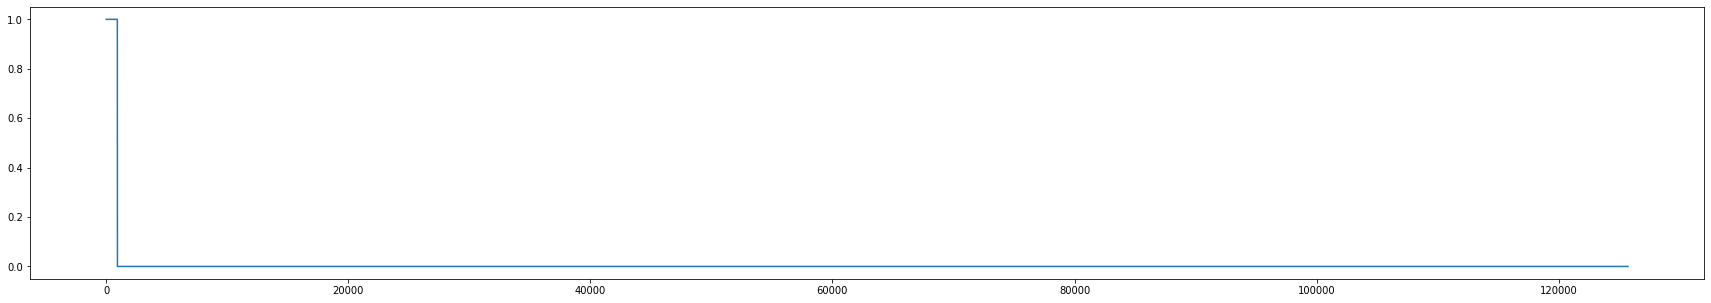

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,5))
plt.plot(vorspann)

In [20]:
sys.path.append("/home/tamara/Documents/DeepHumanVision_pilot/")
from data_base.db_setup import *
import data_preprocessing.binning as binning

Please enter DataJoint username:  tamara
Please enter DataJoint password:  ·········


Connecting tamara@localhost:3306


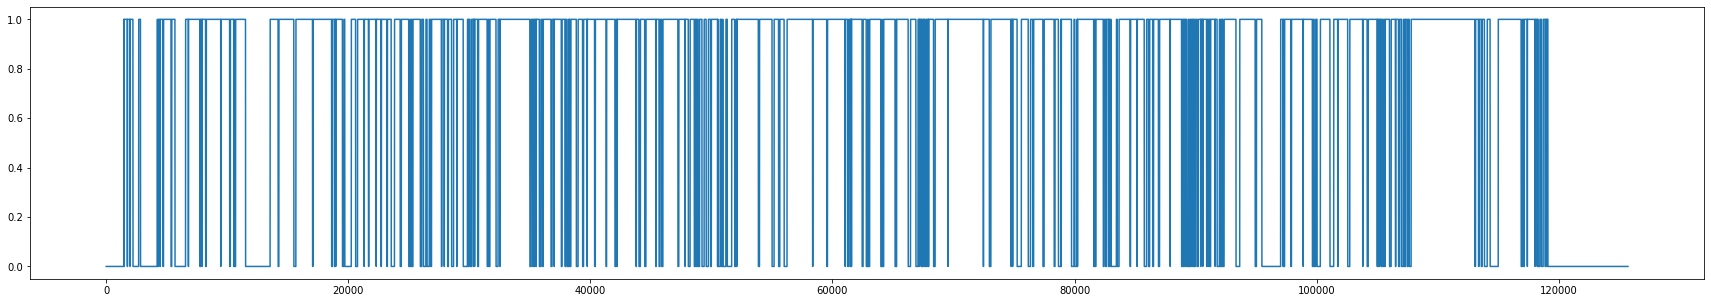

In [26]:
tom_db_name = (VideoAnnotation() & "label_name='tom'").fetch("movie_label")[0]
tom_db = np.load(tom_db_name)

plt.figure(figsize=(30,5))
plt.plot(tom_db)

In [64]:
start_end_times, indicator_function = extract_labels_from_json_file("/home/tamara/Documents/DeepHumanVision_pilot/movie_annotation/advene/500days_of_summer_20191209.json", "ikea", False, False)

125725


In [65]:
sum(indicator_function_rachel)

4655

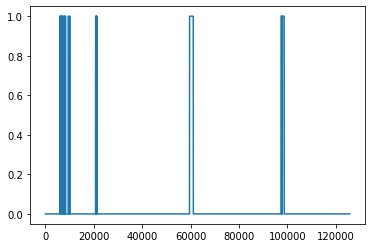

In [66]:
import matplotlib.pyplot as plt

plt.plot(indicator_function_rachel)
plt.show()

In [67]:
np.save("../indicators/rachel_indicator_fxn_20191209.npy", indicator_function_rachel)

In [70]:
def create_indicator_function(label_name):
    start_end_times, indicator_function = extract_labels_from_json_file("/home/tamara/Documents/DeepHumanVision_pilot/movie_annotation/advene/500days_of_summer_20191209.json", label_name, False, False)
    print(sum(indicator_function))
          
    plt.plot(indicator_function)
    plt.show()
          
    return indicator_function

125725
745


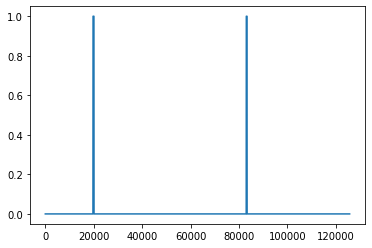

In [82]:
name_label = "identical_scene_summer"
label = create_indicator_function(name_label)

In [83]:
np.save("../indicators/{}_indicator_fxn_20191209.npy".format(name_label), label)

## Create an xml text to add to the config file

In [28]:
def create_xml_for_advene(id_name, star_end_times_vector, label_name):
    new_annotations = ""
    id_ = 0

    for start, end in star_end_times_vector:
        string_new_annotation = '<annotation id="{}{}" type="#{}"><millisecond-fragment begin="{}" end="{}"/><content>num=1</content></annotation>'.format(
            id_name, id_, label_name, int(start * 1000), int(end * 1000))
        # element = ET.fromstring(string_new_annotation)
        # print(string_new_annotation)
        new_annotations += string_new_annotation

        id_ += 1
    return new_annotations

In [31]:
create_xml_for_advene("rachel", start_end_times_rachel_seconds, "rachel")

'<annotation id="rachel0" type="#rachel"><millisecond-fragment begin="240647" end="260817"/><content>num=1</content></annotation><annotation id="rachel1" type="#rachel"><millisecond-fragment begin="271080" end="274288"/><content>num=1</content></annotation><annotation id="rachel2" type="#rachel"><millisecond-fragment begin="277384" end="292301"/><content>num=1</content></annotation><annotation id="rachel3" type="#rachel"><millisecond-fragment begin="306243" end="306969"/><content>num=1</content></annotation><annotation id="rachel4" type="#rachel"><millisecond-fragment begin="311849" end="314349"/><content>num=1</content></annotation><annotation id="rachel5" type="#rachel"><millisecond-fragment begin="326213" end="327661"/><content>num=1</content></annotation><annotation id="rachel6" type="#rachel"><millisecond-fragment begin="329756" end="334677"/><content>num=1</content></annotation><annotation id="rachel7" type="#rachel"><millisecond-fragment begin="378847" end="385293"/><content>num

In [18]:
identical_scene_summer_start_end_times = export_labels_from_json_file("/home/tamara/Desktop/labels_plus_identical_scene_summer.json", "identical_scene_summer", True)

In [19]:
identical_scene_summer_start_end_times

[[787312, 803744], [3319659, 3333008]]

In [4]:
ikea_label = processing_labels.export_labels_from_json_file("/home/tamara/Documents/DeepHumanVision_pilot/movie_annotation/advene/500days_of_summer.json", "ikea", True)

In [5]:
ikea_label

[[294966, 299630],
 [1555591, 1573631],
 [1576454, 1763313],
 [3409927, 3412464],
 [3959482, 3962867]]

In [6]:
ikea_default_label = processing_labels.create_default_label_from_advene_json_file("/home/tamara/Documents/DeepHumanVision_pilot/movie_annotation/advene/500days_of_summer.json", "ikea", False)

119694


In [10]:
sum(ikea_default_label) / len(ikea_default_label)

0.04498972379567898

In [11]:
np.save("/home/tamara/Documents/DeepHumanVision_pilot/data_base/data/movie_labels/13_ikea_p5_20191105_location.npy", ikea_default_label)